[The Fourier Transform](http://www.thefouriertransform.com)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile 

In [26]:
audio_file='data/pineapple/pineapple01.wav'
sampling_freq, signal = wavfile.read(audio_file)
signal = signal / np.power(2,15)
len_signal = len(signal)
len_half = np.ceil((len_signal +1)/2.0).astype(np.int)
print('Freq', sampling_freq, 'Shape', signal.shape)

Freq 8000 Shape (4551,)


In [27]:
freq_signal = np.fft.fft(signal)

In [28]:
freq_signal = abs(freq_signal[0:len_half]) / len_signal
freq_signal **= 2
len_fts = len(freq_signal)

In [29]:
if len_signal %2:
    freq_signal[1: len_fts] *= 2
else:
    freq_signal[1: len_fts - 1] *=2

In [31]:
# Extract the power value in db
signal_power = 10 * np.log10(freq_signal)
x_axis = np.arange(0, len_half, 1) * (sampling_freq/len_signal) / 1000.0

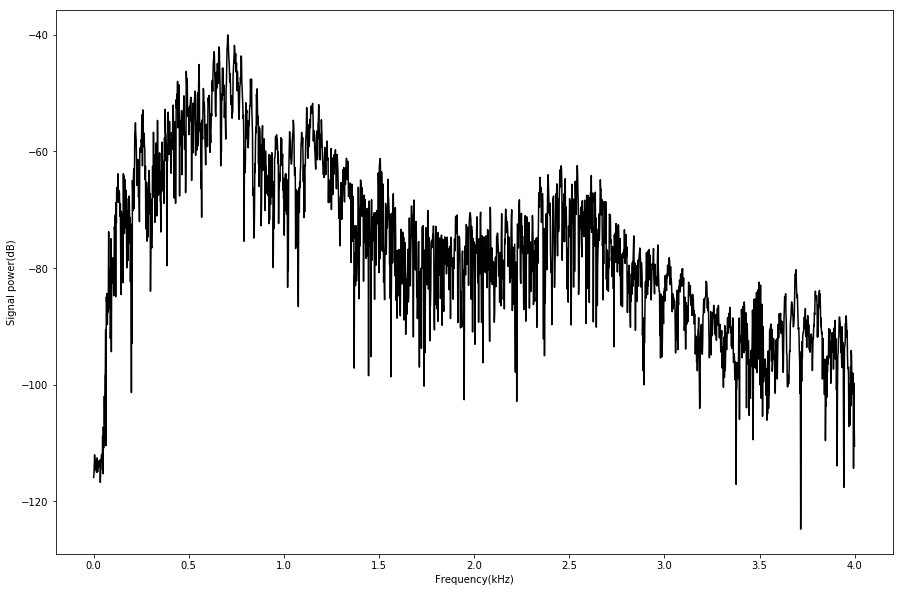

In [34]:
plt.figure(figsize=(15,10))
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency(kHz)')
plt.ylabel('Signal power(dB)')
plt.show()